In [1]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd

In [40]:
stocks = ['AAPL','AMZN','MSFT','JBL']
data = web.DataReader(stocks,data_source='yahoo',start='01/01/2010')['Adj Close']
data.sort_index(inplace=True)
returns = data.pct_change()

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2326 entries, 2009-12-31 to 2019-03-29
Data columns (total 4 columns):
AAPL    2326 non-null float64
AMZN    2326 non-null float64
JBL     2326 non-null float64
MSFT    2326 non-null float64
dtypes: float64(4)
memory usage: 90.9 KB


In [42]:
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

In [43]:
cov_matrix

Symbols,AAPL,AMZN,JBL,MSFT
Symbols,,,,
AAPL,0.000270,0.000127,0.000148,0.000108
AMZN,0.000127,0.000399,0.000149,0.000139
JBL,0.000148,0.000149,0.000469,0.000135
MSFT,0.000108,0.000139,0.000135,0.000210


In [50]:
num_portfolios = 25000
results = np.zeros((3,num_portfolios))
prop_weights=[]
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.random.random(4)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    prop_weights.append(weights)
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]

In [51]:
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

In [52]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
w=prop_weights[results_frame['sharpe'].idxmax()]
#min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

In [64]:
e=["weigths of apple:","weights of amazon:","weigths of JBL:","weights of Microsoft:"]
print("High Rish, High Return")
for n,i in enumerate(w):
    print(e[n],i)

High Rish, High Return
weigths of apple: 0.45904694612868296
weights of amazon: 0.4049145676810821
weigths of JBL: 8.478675253250926e-05
weights of Microsoft: 0.1359536994377024


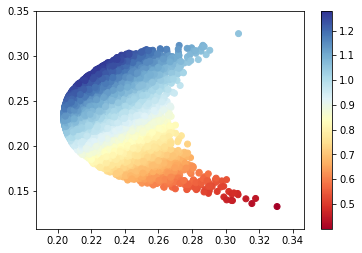

In [46]:
import matplotlib.pyplot as plt
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.show()